In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from pprint import pprint

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


In [4]:
#Loading Dataset
vino5 = pd.read_csv("vino4.csv")

In [6]:
vino5.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality2
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [5]:
vino5.value_counts(['quality2'])

quality2
1           660
0           579
dtype: int64

In [7]:
# Splitting the dataset into the Training set and Test set into 80:20 ratio
X = vino5.drop(['quality2'], axis=1)
y = vino5['quality2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (991, 11)
Shape of X_test:  (248, 11)


In [9]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

# Part II: Machine Learning Models

Models & Evaluation: LogisticRegression, Random Forest, Support Vector, GaussianNB, Xgboost

Model Comparison

Selecting & Tunning Model

Prediction Example

Conclusions

In [10]:
#Base Models 
models = [LogisticRegression(),RandomForestClassifier(),SVC(kernel='rbf'), GaussianNB(), XGBClassifier()]
 
for i in range(5):
    models[i].fit(X_train_s, y_train)
 
    print(f'{models[i]} : ')
    print('Training ROC : ', metrics.roc_auc_score(y_train, models[i].predict(X_train_s)))
    print('Test ROC : ', metrics.roc_auc_score(y_test, models[i].predict(X_test_s)))
    print('Accuracy: ', metrics.accuracy_score(y_test, models[i].predict(X_test_s)))
    print()

LogisticRegression() : 
Training ROC :  0.7366381068951449
Test ROC :  0.7422542735042734
Accuracy:  0.7379032258064516



RandomForestClassifier() : 
Training ROC :  1.0
Test ROC :  0.7609508547008548
Accuracy:  0.7580645161290323

SVC() : 
Training ROC :  0.7979559363525092
Test ROC :  0.750534188034188
Accuracy:  0.7459677419354839

GaussianNB() : 
Training ROC :  0.7353202774377804
Test ROC :  0.7262286324786325
Accuracy:  0.717741935483871

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None,

Model1 : Logistic Regression

In [11]:
model1 = LogisticRegression(random_state = 42)
model1.fit(X_train_s, y_train)
predictions1 = model1.predict(X_test_s)

In [12]:
c_matrix = metrics.confusion_matrix(y_test, predictions1)
c_matrix

array([[ 80,  24],
       [ 41, 103]], dtype=int64)

In [13]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       104
           1       0.81      0.72      0.76       144

    accuracy                           0.74       248
   macro avg       0.74      0.74      0.74       248
weighted avg       0.75      0.74      0.74       248



In [14]:
fpr1, tpr1, thresh1 = roc_curve(y_test, predictions1, pos_label=1)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, predictions1))

roc_auc_score for Logistic Regression:  0.7422542735042734


Model 2: Random Forest

In [10]:
model2 = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
model2.fit(X_train_s, y_train)
predictions2 = model2.predict(X_test_s)

In [11]:
c_matrix2 = metrics.confusion_matrix(y_test, predictions2)
c_matrix2

array([[ 82,  22],
       [ 36, 108]], dtype=int64)

In [12]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74       104
           1       0.83      0.75      0.79       144

    accuracy                           0.77       248
   macro avg       0.76      0.77      0.76       248
weighted avg       0.77      0.77      0.77       248



In [13]:
fpr2, tpr2, thresh2 = roc_curve(y_test, predictions2, pos_label=1)
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, predictions2))

roc_auc_score for Random Forest:  0.7692307692307692


Model 3 :Support Vector Machine (SVM)

In [19]:
model3 = SVC(random_state=42)
model3.fit(X_train_s, y_train)
predictions3 = model3.predict(X_test_s)

In [20]:
c_matrix3 = metrics.confusion_matrix(y_test, predictions2)
c_matrix3

array([[ 82,  22],
       [ 36, 108]], dtype=int64)

In [21]:
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       104
           1       0.82      0.72      0.77       144

    accuracy                           0.75       248
   macro avg       0.74      0.75      0.74       248
weighted avg       0.76      0.75      0.75       248



In [22]:
fpr3, tpr3, thresh3 = roc_curve(y_test, predictions3, pos_label=1)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, predictions3))

roc_auc_score for SVM:  0.750534188034188


Model 4:Naive Bayes

In [23]:
model4 = GaussianNB()
model4.fit(X_train_s, y_train)
predictions4 = model4.predict(X_test_s)

In [24]:
c_matrix4 = metrics.confusion_matrix(y_test, predictions4)
c_matrix4

array([[81, 23],
       [47, 97]], dtype=int64)

In [25]:
print(classification_report(y_test,predictions4))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       104
           1       0.81      0.67      0.73       144

    accuracy                           0.72       248
   macro avg       0.72      0.73      0.72       248
weighted avg       0.73      0.72      0.72       248



In [26]:
fpr4, tpr4, thresh4 = roc_curve(y_test, predictions4, pos_label=1)
print('roc_auc_score for GaussianNB : ', roc_auc_score(y_test, predictions4))

roc_auc_score for GaussianNB :  0.7262286324786325


Model 5: Xgboost

In [74]:
model5 = XGBClassifier(learning_rate=.1,max_depth=6, random_state = 42)
model5.fit(X_train_s, y_train)
predictions5 = model5.predict(X_test_s)


In [75]:
c_matrix5 = metrics.confusion_matrix(y_test, predictions5)
c_matrix5

array([[ 78,  26],
       [ 32, 112]], dtype=int64)

In [76]:
print(classification_report(y_test,predictions5))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       104
           1       0.81      0.78      0.79       144

    accuracy                           0.77       248
   macro avg       0.76      0.76      0.76       248
weighted avg       0.77      0.77      0.77       248



In [77]:
fpr5, tpr5, thresh5 = roc_curve(y_test, predictions5, pos_label=1)
print('roc_auc_score for XGBoost: ', roc_auc_score(y_test, predictions5))

roc_auc_score for XGBoost:  0.7638888888888888


Model Comparison

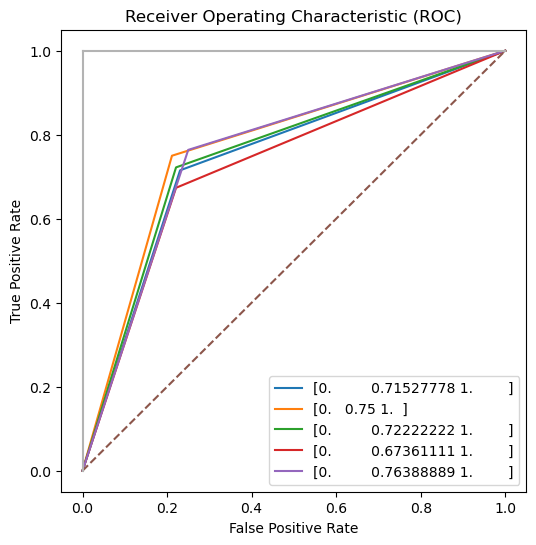

In [31]:
    plt.subplots(1, figsize=(6,6))
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(fpr1, tpr1,fpr2, tpr2,fpr3, tpr3, fpr4, tpr4, fpr5, tpr5)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend([tpr1,tpr2,tpr3,tpr4,tpr5],loc='lower right')
    plt.show()

In [32]:
# ROC AUC score compares the relation between True Positive and False Positive rate in other words how efficient the model is 
# while accuracy is the percentage of correct predictions "Accuracy from confusion matrix is ", (TN+TP)/Total)

In [33]:
results = pd.DataFrame(columns=['Model','Accuracy','ROC'])

In [34]:
#results.loc[len(results)]=['Logistic Regression', accuracy_score(y_test,predictions1),roc_auc_score(y_test, predictions1)]
#results.loc[len(results)]=['Random Forest', accuracy_score(y_test,predictions2),roc_auc_score(y_test, predictions2)]
#results.loc[len(results)]=['Support Vector', accuracy_score(y_test,predictions3),roc_auc_score(y_test, predictions3)]
#results.loc[len(results)]=['Naive Bayes', accuracy_score(y_test,predictions4),roc_auc_score(y_test, predictions4)]
#results.loc[len(results)]=['XG Boost', accuracy_score(y_test,predictions5),roc_auc_score(y_test, predictions5)]
#results

In [35]:
# Conclusion:RandomForest model had the higher Accuracy and ROC score. In the next steps this model will be tunned to get 
# the highest possible performance rate.

Tunning RandomForest Model

In [14]:
model2.feature_importances_

array([0.04930681, 0.12844876, 0.05647932, 0.0406176 , 0.05684885,
       0.04381833, 0.10538638, 0.07141377, 0.05033115, 0.15944187,
       0.23790717])

In [15]:
importances = model2.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = vino5.columns[1:]
 
for f in range(X_train_s.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) quality2                       0.237907
 2) alcohol                        0.159442
 3) citric acid                    0.128449
 4) density                        0.105386
 5) pH                             0.071414
 6) free sulfur dioxide            0.056849
 7) residual sugar                 0.056479
 8) sulphates                      0.050331
 9) volatile acidity               0.049307
10) total sulfur dioxide           0.043818
11) chlorides                      0.040618


In [53]:
# Splitting and removing features
X2 = vino5.drop(['quality2','volatile acidity','total sulfur dioxide','chlorides'], axis=1)
y2 = vino5['quality2']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)


In [54]:
sc2 = StandardScaler()
X_train_s2 = sc.fit_transform(X_train2)
X_test_s2 = sc.transform(X_test2)

In [56]:
model22 = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
model22.fit(X_train_s2, y_train2)
predictions22 = model22.predict(X_test_s2)

In [57]:
print(classification_report(y_test,predictions22))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       104
           1       0.87      0.72      0.79       144

    accuracy                           0.77       248
   macro avg       0.78      0.79      0.77       248
weighted avg       0.79      0.77      0.78       248



In [42]:
# Accuracy did not improved after removing some of the features. In the next steps parameters will be tune.

In [20]:
#Current parameters
print('Parameters currently in use:\n')
pprint(model22.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [41]:
#Tunning parameters
model22B = RandomForestClassifier(n_estimators=400, max_features='log2', min_samples_leaf=4, min_samples_split=4, max_depth=13, random_state=42)
model22B.fit(X_train_s2, y_train2)
predictions22B = model22B.predict(X_test_s2)

In [42]:
print(classification_report(y_test,predictions22B))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       104
           1       0.85      0.78      0.81       144

    accuracy                           0.79       248
   macro avg       0.79      0.79      0.79       248
weighted avg       0.80      0.79      0.79       248



In [43]:
fpr22B, tpr22B, thresh22B = roc_curve(y_test, predictions22B, pos_label=1)
print('roc_auc_score for Improved RandomForest: ', roc_auc_score(y_test, predictions22B))

roc_auc_score for Improved RandomForest:  0.7927350427350428


In [47]:
#After modifying parameters accuracy improved from 77 to 79 and ROC from 76 to 79.

In [48]:
c_matrix22B = metrics.confusion_matrix(y_test2, predictions22B)
c_matrix22B

array([[ 84,  20],
       [ 31, 113]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

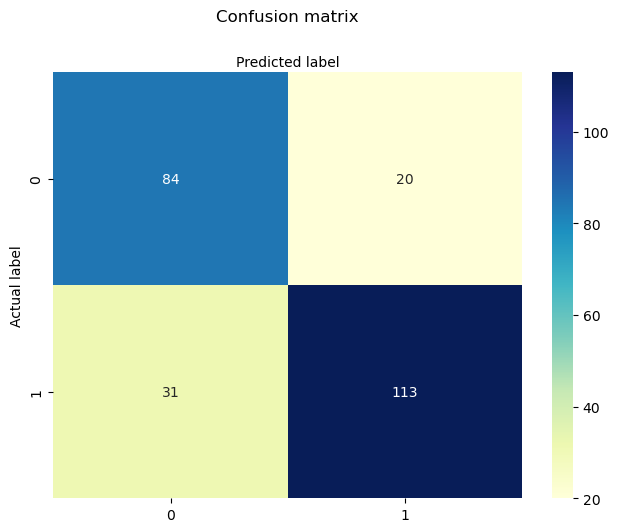

In [50]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(c_matrix22B), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

RandomForest Cross Validation

In [37]:
rfc_model = cross_val_score(estimator=model22B, X=X_train_s2, y=y_train2, cv=10)
rfc_model.mean()

RandomForest GridSearchCV & RandomizedSearchCV

In [ ]:

#param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 14],
    'max_leaf_nodes': [3, 6, 9],
}

In [ ]:
#grid_search = GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
#grid_search.fit(X_train_s2, y_train2)
#print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=3, max_features='log2', max_leaf_nodes=9)


In [ ]:

#random_search = RandomizedSearchCV(RandomForestClassifier(),param_grid)
#random_search.fit(X_train_s2, y_train2)
#print(random_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9)


In [39]:
##Note: the following code takes about 40 min to run.
forest_params = [{'max_depth': list(range(10, 15)), 'max_features':(['sqrt', 'log2', None]), 'min_samples_leaf':(3, 4, 6), 'min_samples_split':(4,6,8,10)}]
model = GridSearchCV(model22B, forest_params, cv=10, scoring='accuracy')
#model.fit(X_train_s2, y_train2)


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=14, max_features='log2',
                                              min_samples_leaf=3,
                                              min_samples_split=8,
                                              n_estimators=400,
                                              random_state=42),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_leaf': (3, 4, 6),
                          'min_samples_split': (4, 6, 8, 10)}],
             scoring='accuracy')

In [40]:
#model.best_params_

{'max_depth': 13,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 4}

In [ ]:
#forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
#model = GridSearchCV(model22B, forest_params, cv=10, scoring='accuracy')
#model.fit(X_train_s2, y_train2)

In [ ]:
#model.best_params_

{'max_depth': 14, 'max_features': 4}

In [ ]:
#model.best_score_

0.7295656565656565

In [24]:
param_dist = {"max_depth": [3, 14, 16, None],
              "max_features":['sqrt', 'log2', None],
              "min_samples_split":[2,4,6, 8, 10],
              "min_samples_leaf":[1,3,5, 7, 9],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [33]:
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(model22B, param_distributions=param_dist, n_iter=samples,cv=10)

In [34]:
randomCV.fit(X_train_s2, y_train2)
print(randomCV.best_params_)

{'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}


In [35]:
randomCV.cv_results_['mean_test_score']

array([0.71243434, 0.72151515, 0.70130303, 0.71139394, 0.71444444,
       0.71243434, 0.71445455, 0.70738384, 0.71747475, 0.70838384])

Prediction Example

In [ ]:
X_test2.head(1)

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,density,pH,sulphates,alcohol
415,8.1,0.24,2.1,5.0,0.9972,3.37,0.77,10.7


In [ ]:

input_data2 = (7.4,0.7,1.9,4,0.9978,3.51,0.56,9.4)

input_data_as_numpy_array = np.asarray(input_data2)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model22B.predict(input_data_reshaped)
print (prediction)

if (prediction[0]==1):
    print('Good Wine')
else:
    print('Bad quality wine')

[1]
Good Wine


# Part III: Conclusions

In [ ]:
#import pickle
#filename = 'trained_model.sav'
#pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
#loaded_model = pickle.load(open('trained_model.sav', 'rb'))